In [3]:
#Packages import
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import lightkurve as lk
from lightkurve import TessTargetPixelFile
import math
import astropy.units as u

/home/orion/.local/lib/python3.8/site-packages/lightkurve/collections.py:212: LightkurveWarning: The following columns will be excluded from stitching because the column types are incompatible: {'sap_flux', 'sap_bkg_err', 'sap_bkg'}
  warnings.warn(


<IPython.core.display.Javascript object>


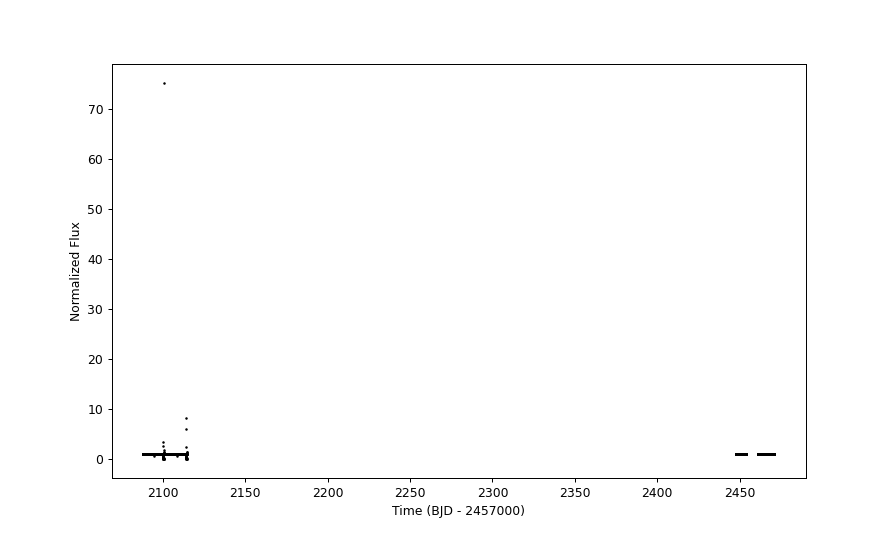

In [4]:
TIC = 'TIC 176220787'

available_data_select = lk.search_lightcurve(TIC, mission = 'TESS') 
lc_collection = available_data_select.download_all().stitch()

fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = "black", s = 1)

plt.xlabel("Time (BJD - 2457000)")
plt.ylabel("Normalized Flux")
plt.show()

29

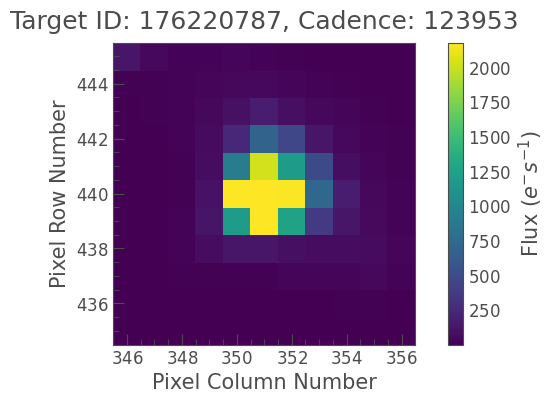

In [1]:
tpf = TessTargetPixelFile("/home/orion/Geo/hlsp_tess-spoc_tess_phot_0000000176220787-s0029_tess_v1_tp.fits") #change the directory
tpf.plot()
tpf.interact()
tpf.sector

In [2]:
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)

In [3]:
lc.time, lc.flux

(<Time object: scale='tdb' format='btjd' value=[2088.25206285 2088.25900758 2088.26595231 ... 2114.41912611 2114.42607055
  2114.43301498]>,
 <Quantity [23972.645, 23961.459, 23970.832, ..., 24153.035, 24115.492,
            24170.014] electron / s>)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

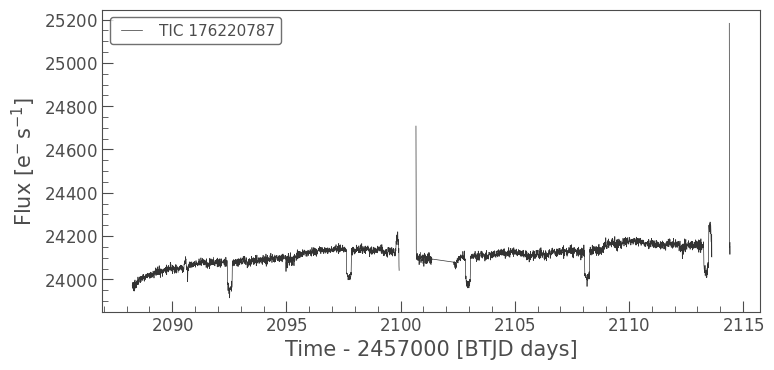

In [4]:
lc.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

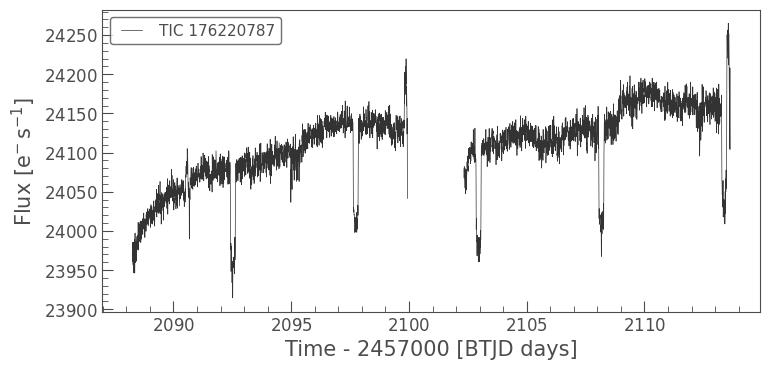

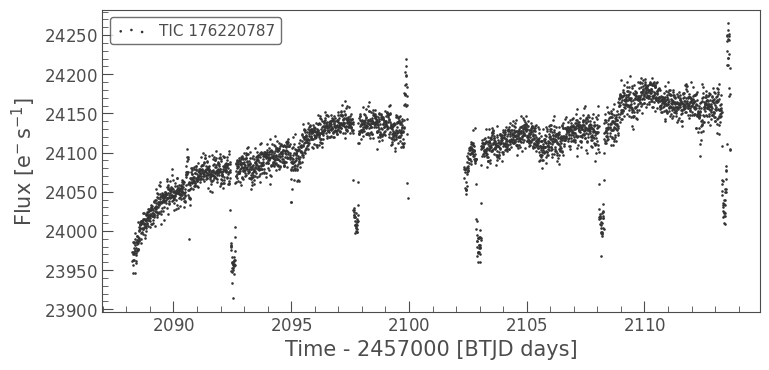

In [5]:
mask = ((lc.time.value < 2100.5)&(lc.time.value > 2088))|((lc.time.value < 2114)&(lc.time.value > 2102))
masked_lc=lc[mask];
masked_lc.plot();
masked_lc.scatter(s=3)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

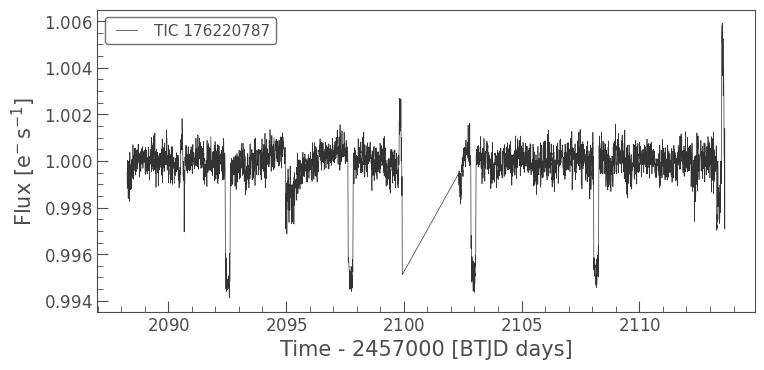

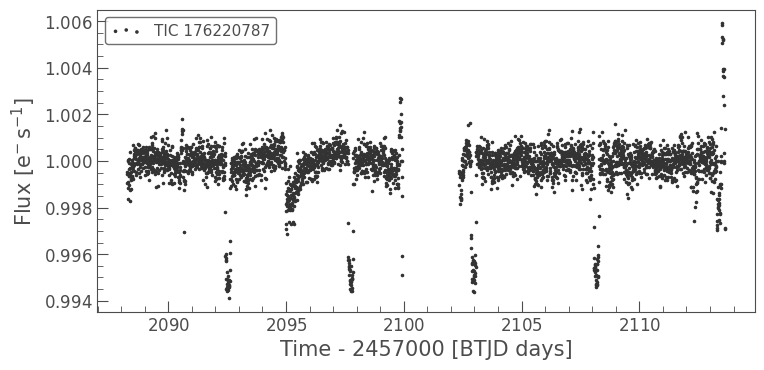

In [6]:
flat_lc = masked_lc.flatten(window_length=401).remove_nans().remove_outliers(sigma=5.5)
flat_lc.plot();
flat_lc.scatter(s=10)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

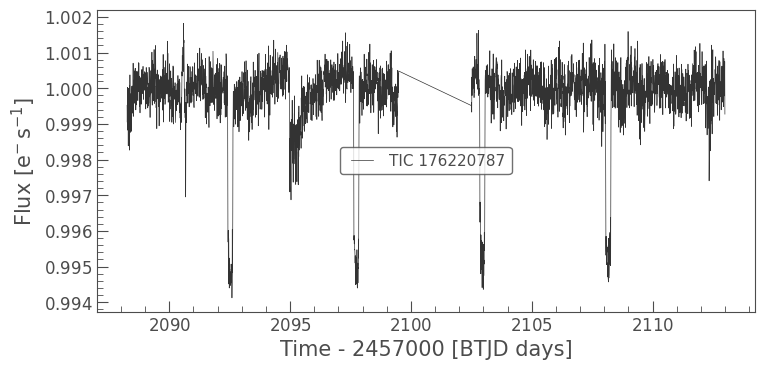

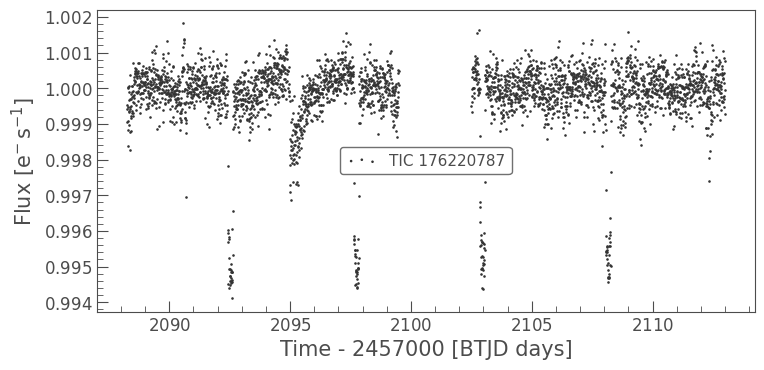

In [7]:
mask2 = ((flat_lc.time.value < 2099.5)&(flat_lc.time.value > 2088))|((flat_lc.time.value < 2113)&(flat_lc.time.value > 2102.5))
masked2_lc=flat_lc[mask2];
masked2_lc.plot();
masked2_lc.scatter(s=3)

Period at max power = 5.215040215040214 d
BLS max power = 12236.768409733775


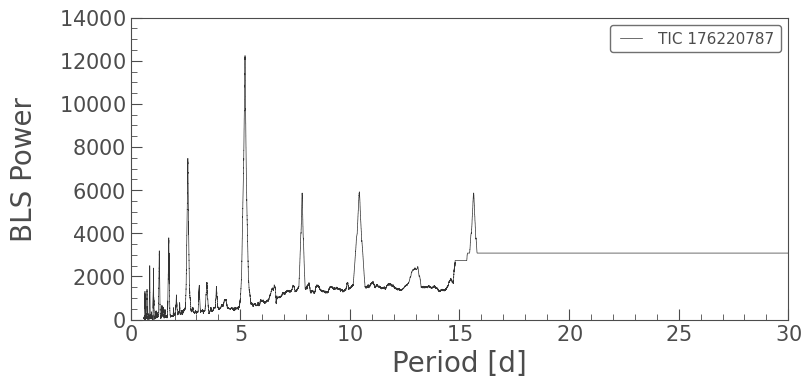

In [8]:
period = np.linspace(0.6,30, 1000000)
bls = masked2_lc.to_periodogram(method='bls', period=period);
bls.plot();
plt.ylabel('BLS Power', fontsize=20, labelpad=15)
plt.xlabel('Period [d]', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlim(0,30)
plt.ylim([0,14000])

print('Period at max power =',bls.period_at_max_power)
print('BLS max power =', bls.max_power)

(0.993, 1.002)

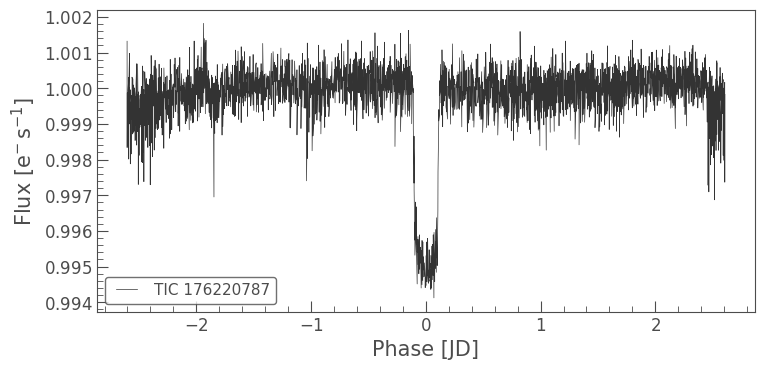

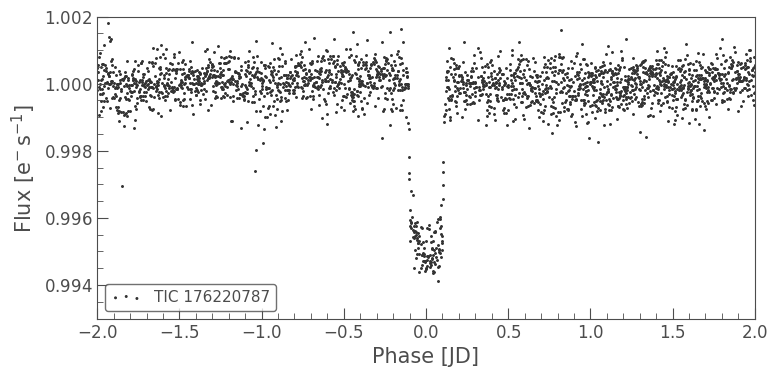

In [9]:
folded_lc = masked2_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)
folded_lc.plot();
folded_lc.scatter(s=5)
plt.xlim(-2,2)
plt.ylim([0.993,1.002])

In [10]:
min = np.min(folded_lc.flux)
print('Minimum flux = ', min)
median = np.median(folded_lc.flux)
print('median flux =', median)
Depth = 1 * u.electron / u.s - min
print('Depth = ', Depth)
ratio = np.sqrt(Depth)
print('Rp/Rs ratio', ratio)

Minimum flux =  0.9941247257821582 electron / s
median flux = 0.999984113466593 electron / s
Depth =  0.0058752742178418416 electron / s
Rp/Rs ratio 0.07665033736287037 electron(1/2) / s(1/2)


(0.993, 1.002)

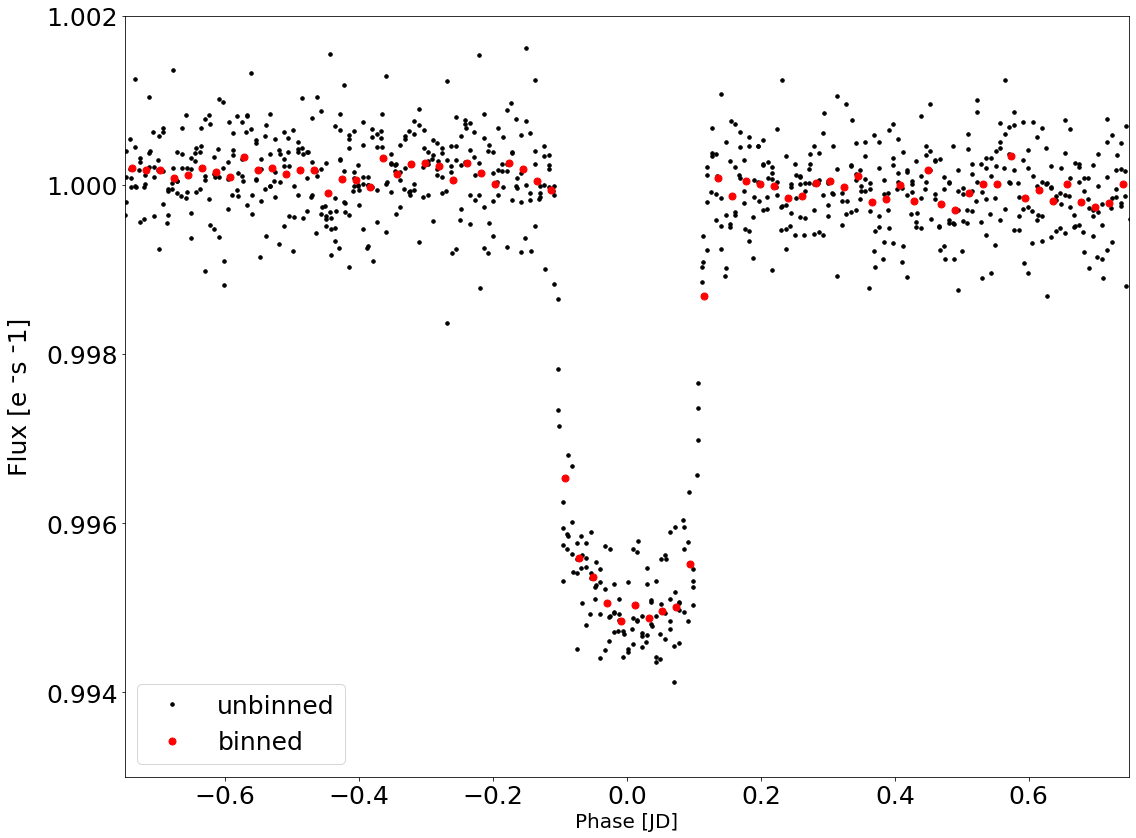

In [11]:
period  = bls.period_at_max_power
t0 = bls.transit_time_at_max_power 

folded2_lc = masked2_lc.fold(bls.period_at_max_power, epoch_time=bls.transit_time_at_max_power)

#Bin the folded lightcurve. Here we bin at 30 minutes
folded2_lc_binned = folded_lc.bin(30/24/60)

fig, ax = plt.subplots(figsize = (18,14))

folded2_lc.plot(ax = ax, marker = '.', linewidth = 0, color = 'black', alpha = 1, markersize = 7)
folded2_lc_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'red', alpha = 1, markersize = 7)
plt.legend(labels= ['unbinned', 'binned'], fontsize=25)
plt.ylabel('Flux [e ־s ־1]', fontsize=25, labelpad=15)
plt.xlabel('Phase [JD]', fontsize=20)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.xlim(-0.75,0.75)
plt.ylim([0.993,1.002])

In [12]:
min = np.min(folded2_lc_binned.flux)
print('Minimum flux = ', min)
median = np.median(folded2_lc_binned.flux)
print('median flux =', median)
Depth = 1 * u.electron / u.s - min
print('Depth = ', Depth)
ratio = np.sqrt(Depth)
print('Rp/Rs ratio', ratio)

Minimum flux =  0.9948465375671872 electron / s
median flux = 1.0000044660911425 electron / s
Depth =  0.005153462432812783 electron / s
Rp/Rs ratio 0.07178762033117397 electron(1/2) / s(1/2)


In [13]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

In [14]:
planet_b_period

<Quantity 5.21504022 d>

In [15]:
planet_b_t0

<Time object: scale='tdb' format='btjd' value=2092.522062845018>

In [16]:
planet_b_dur
print('Transit duration in hours=', planet_b_dur*24, 'hours')

Transit duration in hours= 4.800000000000001 d hours


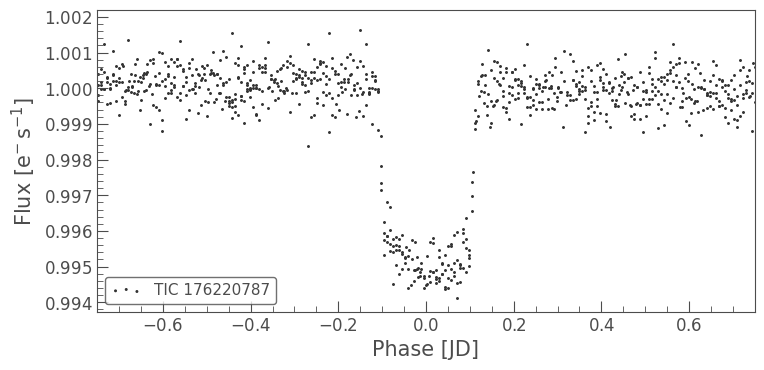

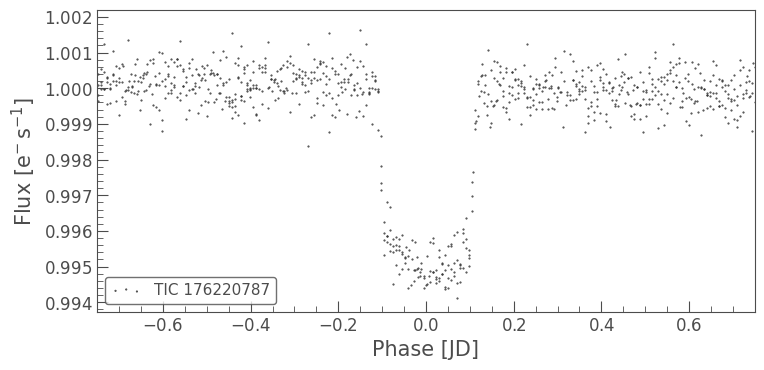

In [17]:
ax = masked2_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter(s=5);
ax.set_xlim(-0.75, 0.75);
ax2 = masked2_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter(s=1);
ax2.set_xlim(-0.75, 0.75);

In [18]:
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

In [5]:
ax = masked2_lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter(s=5);
planet_b_model.fold(period=planet_b_period, epoch_time=planet_b_t0).plot(ax=ax, c='red', lw=1)
ax.set_xlim(-1, 1)
plt.ylabel('Flux [e ־s ־1]', fontsize=15, labelpad=15)
plt.xlabel('Phase [JD]', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.xlim(-0.75,0.75)
plt.ylim([0.99,1.005])


NameError: name 'masked2_lc' is not defined

In [20]:
print(bls.period_at_max_power)
print(bls.transit_time_at_max_power)
print(bls.duration_at_max_power)

5.215040215040214 d
2092.522062845018
0.2 d


In [21]:
P = 5.215040215040214 * 24 * 60 * 60
G = 6.674* 10 ** -11
M = 1.13 * 1.98847 * 10**30
pi = math.pi
a = ((P**2)/((4*pi**2)/(G*M)))**(1/3)
print('Orbital Radius')
print('a =',a , 'm')
print('a =',a/1000 , 'km')
print('a =',a/1000 * 0.000000006684587, 'AU')
print('The planetary mass was neglected')

Orbital Radius
a = 9170413532.139236 m
a = 9170413.532139236 km
a = 0.06130042708156202 AU
The planetary mass was neglected


In [22]:
L = 6.974175
ri= (L/1.1)**(1/2)
ro= (L/0.53)**(1/2)
print('Habitable Zone')
print('The inner boundary of the habitable zone ri =', ri, 'AU')
print('The outer boundary of the habitable zone ro =', ro, 'AU')

Habitable Zone
The inner boundary of the habitable zone ri = 2.5179672537404234 AU
The outer boundary of the habitable zone ro = 3.6275088910596733 AU


In [23]:
Rs = 2.39014
Transit_depth = 0.005153462432812783
Rsun  = 696340
Rearth = 6371
Rp = (Rs * Transit_depth ** (1/2)) * Rsun
print('Planet Radius')
print('Rp =', Rp, 'km')
print('Rp=',Rp/Rearth, 'Rearth')

Planet Radius
Rp = 119479.73218678497 km
Rp= 18.753685792934384 Rearth


In [24]:
P = 5.215040215040214 * 24 * 60 * 60
pi = math.pi
a = 9170413532.139236
v = (2*pi*a/P)
print('Planet Velocity')
print('v =',v , 'm/s')

Planet Velocity
v = 166121.1211091859 m/s


In [25]:
lk.show_citation_instructions()